In [2]:
import pandas as pd
import numpy as np
import warnings
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [47]:
social = pd.read_csv('data/acssocial.csv')
social.columns = social.loc[0]
social = social.drop(0)
social = social[social['Geographic Area Name'].str.contains('not defined')==False]
social = social[social['Geographic Area Name'].str.contains('Delegate District')==False]
social = social[social['Geographic Area Name'].str.contains('Resident Commissioner') == False]
social['Native'] = pd.to_numeric(social['Estimate!!PLACE OF BIRTH!!Total population!!Native'])
social['Total'] = pd.to_numeric(social['Estimate!!PLACE OF BIRTH!!Total population'])
social['Foreign'] = pd.to_numeric(social['Estimate!!PLACE OF BIRTH!!Total population!!Foreign born'])
social['Non-naturalized'] = pd.to_numeric(social['Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen'])
social['Recent immigrant'] = pd.to_numeric(social['Estimate!!YEAR OF ENTRY!!Population born outside the United States!!Foreign born!!Entered 2010 or later'])
social['Bachelor+'] = pd.to_numeric(social["Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"])
social['Fertility35-50'] = pd.to_numeric(social['Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 35 to 50 years old'])
social['Fertility15-19'] = pd.to_numeric(social['Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 19 years old'])

social['Native%'] = social['Native']/social['Total']
social['Non-naturalized%total'] = social['Non-naturalized']/social['Total']
social['Non-naturalized%foreign'] = social['Non-naturalized']/social['Foreign']
social['Recent immigrant%'] = social['Recent immigrant']/social['Total']
social['Bachelor+%'] = social['Bachelor+']/social['Total']
social = social[['Geographic Area Name', 'Native', 'Total', 'Foreign', 'Non-naturalized', 'Recent immigrant',
                'Bachelor+', 'Fertility35-50', 'Fertility15-19', 'Native%', 'Non-naturalized%total',
                'Non-naturalized%foreign', 'Recent immigrant%', 'Bachelor+%']]
social.groupby('Geographic Area Name', sort=False).mean().reset_index()


kos = pd.read_csv('data/dkos.csv')
states = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
}

kos['District'] = kos['District'].str.replace('-AL', '-at large')
kos[['State', 'No']] = kos['District'].str.split('-', expand=True)
kos['State'] = kos['State'].map(states)
kos['alphaDistrict'] = kos['State']+'-'+kos['No']
kos = kos[['alphaDistrict', 'Trump', 'Total']]
kos['Trump'] = kos['Trump'].str.replace(',','')
kos['Total'] = kos['Total'].str.replace(',','')
kos['Trump%'] = pd.to_numeric(kos['Trump']) / pd.to_numeric(kos['Total']) * 100
kos = kos.sort_values('alphaDistrict', ascending=True)
kos

demo = pd.read_csv('data/acsreal.csv')
demo.columns = demo.loc[0]
demo = demo.drop(0)
demo['Total'] = np.int64(demo['Estimate!!SEX AND AGE!!Total population']) 
demo['White'] = np.int64(demo['Estimate!!Race alone or in combination with one or more other races!!Total population!!White'])
demo['Black'] = np.int64(demo['Estimate!!Race alone or in combination with one or more other races!!Total population!!Black or African American'])
demo['White%'] = demo['White'] / demo['Total']
demo['Black%'] = demo['Black']/demo['Total']
demo = demo[demo['Geographic Area Name'].str.contains('not defined')==False]
demo = demo[demo['Geographic Area Name'].str.contains('Delegate District')==False]
demo = demo[demo['Geographic Area Name'].str.contains('Resident Commissioner') == False]
demo = demo[['Geographic Area Name', 'White%', 'Black%']]
demo = demo.groupby('Geographic Area Name', sort=False).mean().reset_index()
demo
#sns.histplot(demo['White %'])

combined_data = pd.concat([kos,social, demo], axis=1)
combined_data.head(3)

#sns.histplot(social['Native'] / social['Total'])

,alphaDistrict,Trump,Total,Trump%,Geographic Area Name,Native,Total,Foreign,Non-naturalized,Recent immigrant,...,Fertility35-50,Fertility15-19,Native%,Non-naturalized%total,Non-naturalized%foreign,Recent immigrant%,Bachelor+%,Geographic Area Name,White%,Black%
1,Alabama-01,211370,331886,63.687531,"Congressional District 1 (116th Congress), Ala...",693262.0,714379.0,21117.0,9579.0,5339.0,...,23.0,10.0,0.970440,0.013409,0.453616,0.007474,0.176024,"Congressional District 2 (116th Congress), Ala...",0.655556,0.325386
2,Alabama-02,195953,306714,63.887856,"Congressional District 2 (116th Congress), Ala...",659650.0,678978.0,19328.0,11273.0,6097.0,...,17.0,17.0,0.971534,0.016603,0.583247,0.008980,0.161354,"Congressional District 3 (116th Congress), Ala...",0.706611,0.269578
3,Alabama-03,212012,324741,65.286490,"Congressional District 3 (116th Congress), Ala...",690603.0,713404.0,22801.0,14129.0,8302.0,...,18.0,18.0,0.968039,0.019805,0.619666,0.011637,0.156172,"Congressional District 4 (116th Congress), Ala...",0.891218,0.076489


53.89326764022142
43.69177211822003


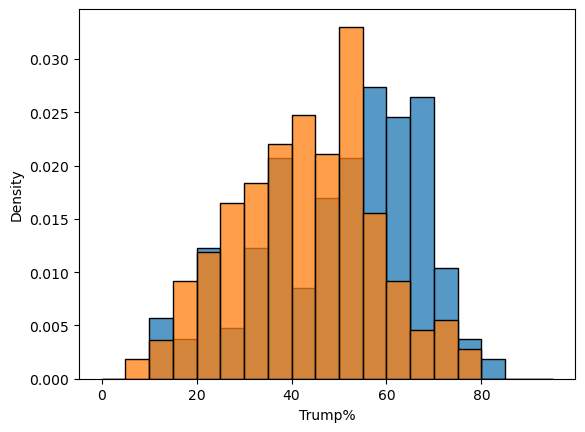

In [60]:
yes = combined_data[combined_data['Native%'] > combined_data['Native%'].median()]
no = combined_data[combined_data['Native%'] <= combined_data['Native%'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

51.333445959116844
44.81375116141566


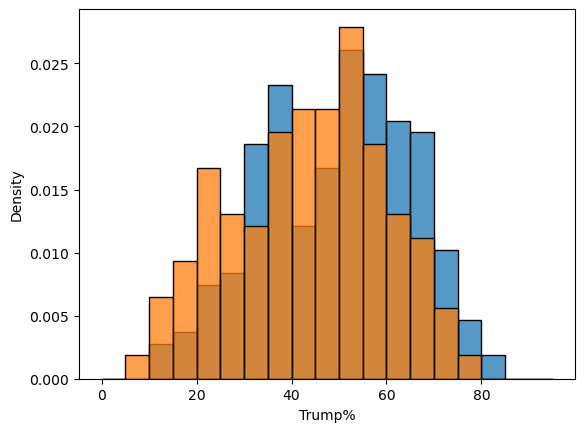

In [61]:
yes = combined_data[combined_data['Non-naturalized%foreign'] > combined_data['Non-naturalized%foreign'].median()]
no = combined_data[combined_data['Non-naturalized%foreign'] <= combined_data['Non-naturalized%foreign'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

43.41535518025146
53.881321570361564


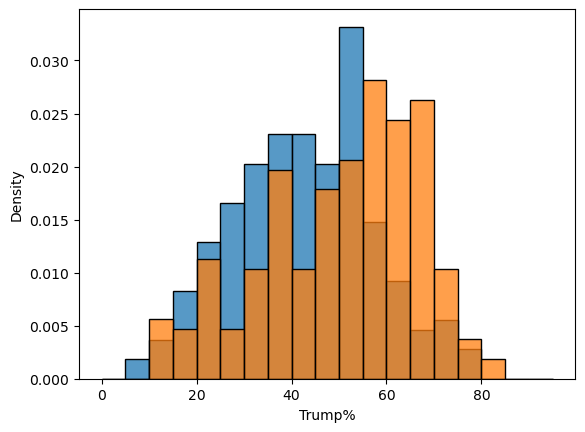

In [62]:
yes = combined_data[combined_data['Non-naturalized%total'] > combined_data['Non-naturalized%total'].median()]
no = combined_data[combined_data['Non-naturalized%total'] <= combined_data['Non-naturalized%total'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

44.20466595970308
51.4259022194411


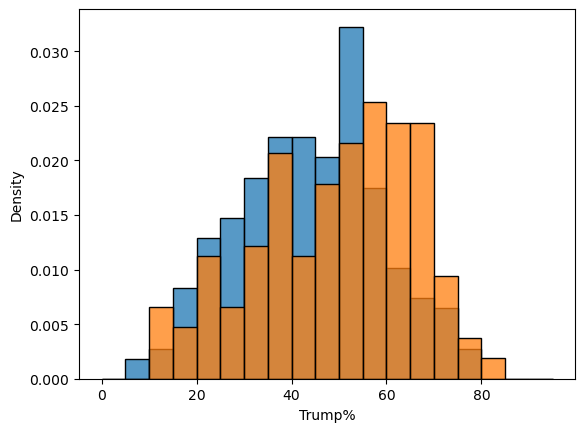

In [63]:
yes = combined_data[combined_data['Recent immigrant%'] > combined_data['Recent immigrant%'].median()]
no = combined_data[combined_data['Recent immigrant%'] <= combined_data['Recent immigrant%'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

46.16015709672347
49.715225863907875


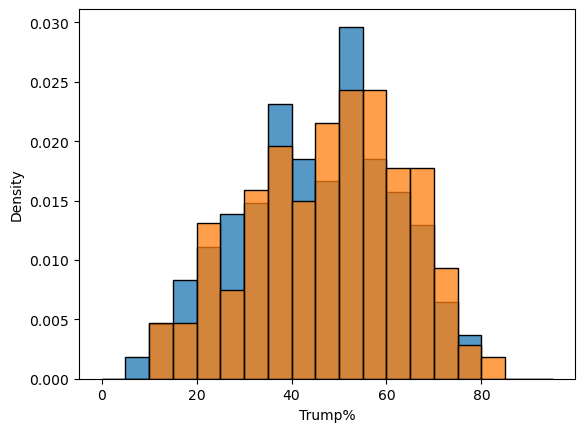

In [64]:
yes = combined_data[combined_data['Bachelor+%'] > combined_data['Bachelor+%'].median()]
no = combined_data[combined_data['Bachelor+%'] <= combined_data['Bachelor+%'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

43.903022724332715
51.4259022194411


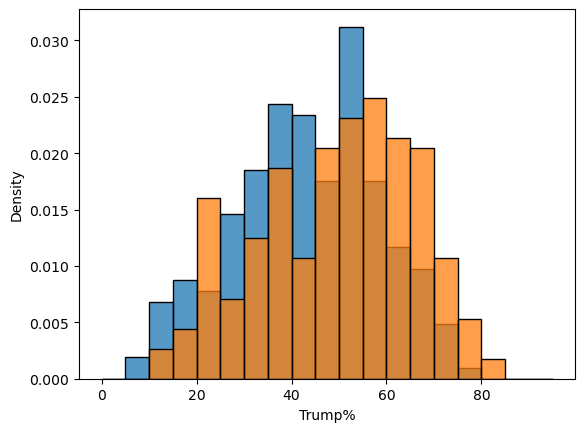

In [65]:
yes = combined_data[combined_data['Fertility35-50'] > combined_data['Fertility35-50'].median()]
no = combined_data[combined_data['Fertility35-50'] <= combined_data['Fertility35-50'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

50.34465539366239
46.368990447940114


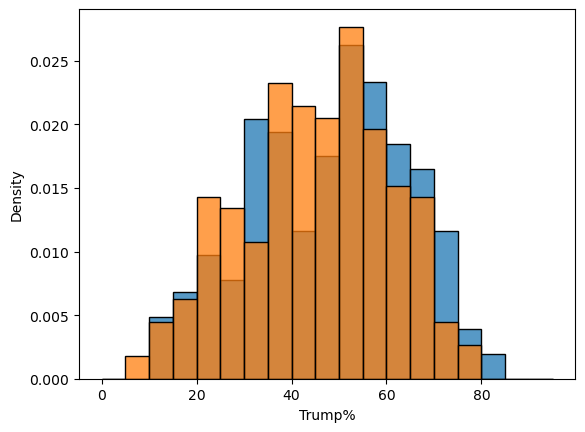

In [66]:
yes = combined_data[combined_data['Fertility15-19'] > combined_data['Fertility15-19'].median()]
no = combined_data[combined_data['Fertility15-19'] <= combined_data['Fertility15-19'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

53.56124225443038
40.00473263204748


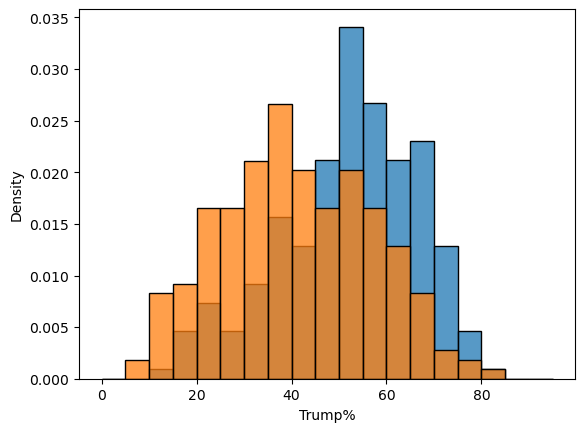

In [67]:
yes = combined_data[combined_data['White%'] > combined_data['White%'].median()]
no = combined_data[combined_data['White%'] <= combined_data['White%'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');

44.27745577033957
51.519842200049965


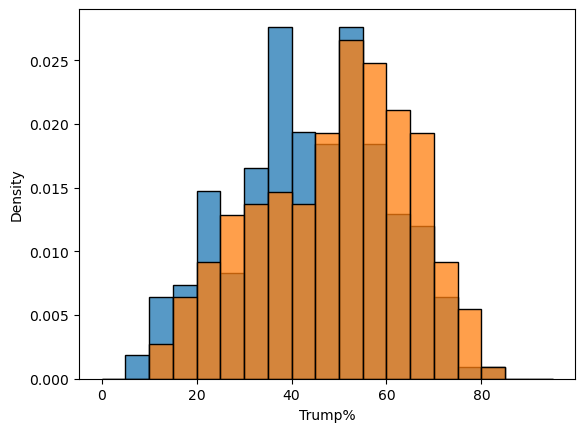

In [68]:
yes = combined_data[combined_data['Black%'] > combined_data['Black%'].median()]
no = combined_data[combined_data['Black%'] <= combined_data['Black%'].median()]
print(yes['Trump%'].median())
sns.histplot(yes['Trump%'], bins = np.arange(0, 100, 5), stat='density');
print(no['Trump%'].median())
sns.histplot(no['Trump%'], bins = np.arange(0, 100, 5),stat='density');